In [1]:
# 读一下数据集， 分析一下item的稀疏度
import numpy as np
from collections import defaultdict

# dataset_name = "Sports_and_Outdoors"
dataset_name = "ml-1m"


with open(f"/home/zzx/seqRec/CLTrys/CoSeRec/data/{dataset_name}.txt","r") as f:
    raw_data = f.readlines()


Seqs = [each.strip().split(' ')[1:] for each in raw_data]

print("序列总个数",len(Seqs))

lens = np.sort([len(each) for each in Seqs])[::-1]

print("序列平均长度", np.mean(lens))

print("序列最大长度", np.max(lens), "; 序列最小长度", np.min(lens))

# TODO：这里要画一个序列长度的分布图

# 下面要统计一下item 出现次数的分布

item_frequency = defaultdict(int)

for seq in Seqs:
    for each_item in seq:
        item_frequency[each_item] +=1
item_frequency_list = np.sort([item_frequency[each] for each in item_frequency])[::-1]
print("物品个数", len(item_frequency))
print("物品最大频次", np.max(item_frequency_list), "; 物品最小频次", np.min(item_frequency_list))
print(np.sum(item_frequency_list>100))
print(np.sum(item_frequency_list>200))
print(np.sum(item_frequency_list>300))
print("物品平均频次", np.mean(item_frequency_list))

序列总个数 6040
序列平均长度 165.49850993377484
序列最大长度 2277 ; 序列最小长度 18
物品个数 3416
物品最大频次 3428 ; 物品最小频次 5
2006
1420
1053
物品平均频次 292.6261709601874


In [2]:
print([each for each in item_frequency_list])

[3428, 2991, 2990, 2883, 2672, 2653, 2649, 2590, 2583, 2578, 2538, 2514, 2513, 2459, 2443, 2369, 2318, 2304, 2288, 2278, 2269, 2250, 2241, 2227, 2223, 2194, 2181, 2171, 2098, 2077, 2024, 1996, 1995, 1924, 1820, 1800, 1799, 1785, 1783, 1751, 1731, 1730, 1728, 1725, 1718, 1716, 1715, 1703, 1697, 1692, 1669, 1666, 1657, 1652, 1650, 1628, 1627, 1599, 1585, 1568, 1548, 1546, 1539, 1527, 1522, 1511, 1511, 1495, 1491, 1473, 1473, 1451, 1451, 1451, 1448, 1434, 1434, 1431, 1424, 1421, 1419, 1417, 1412, 1400, 1389, 1382, 1382, 1377, 1373, 1371, 1367, 1367, 1362, 1356, 1353, 1352, 1351, 1345, 1341, 1340, 1334, 1331, 1330, 1329, 1326, 1315, 1315, 1313, 1313, 1310, 1297, 1269, 1263, 1261, 1259, 1255, 1254, 1251, 1240, 1240, 1237, 1233, 1233, 1229, 1229, 1229, 1222, 1222, 1220, 1207, 1205, 1199, 1193, 1185, 1179, 1177, 1176, 1163, 1163, 1162, 1158, 1158, 1156, 1152, 1148, 1143, 1137, 1136, 1135, 1129, 1128, 1127, 1127, 1126, 1124, 1121, 1120, 1119, 1118, 1116, 1116, 1113, 1112, 1110, 1110, 1099, 109

3209


/tmp/ipykernel_4303/2494011023.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_item_frequency_list, hist=True, kde=False)


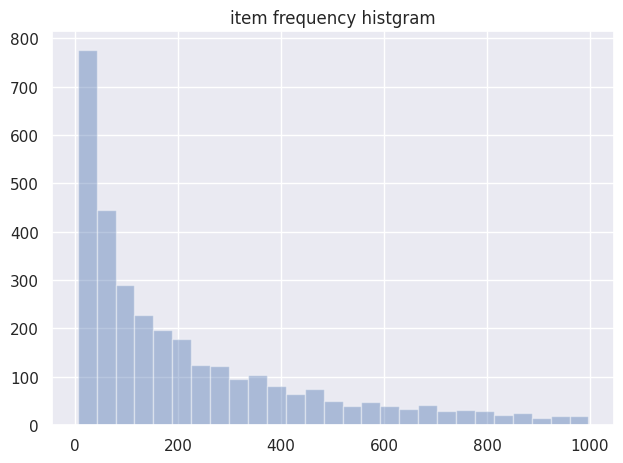

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
sns.set()  #切换到sns的默认运行配置
# sns.distplot(nums,hist=True,norm_hist=False,kde=False,)
temp_item_frequency_list = item_frequency_list[item_frequency_list<=1000]  #100 for sports
print(len(temp_item_frequency_list))
sns.distplot(temp_item_frequency_list, hist=True, kde=False)
#添加x轴和y轴标签
plt.title("item frequency histgram")
plt.tight_layout()  # 处理显示不完整的问题
plt.show()


<BarContainer object of 3209 artists>

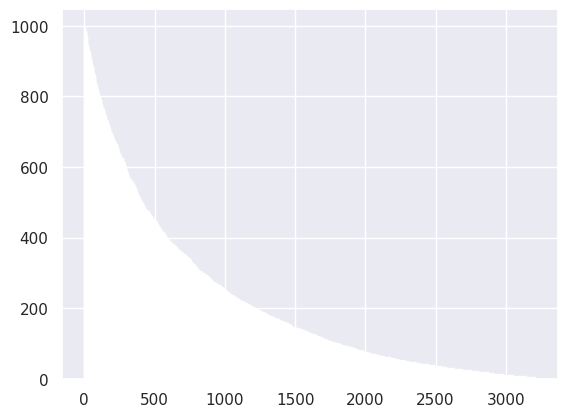

In [6]:
# 改一种画图方式：横轴是item index，纵轴是物品出现频次
# 
temp_item_frequency_list = item_frequency_list[item_frequency_list<=1000]
plt.bar([i for i in range(len(temp_item_frequency_list))], temp_item_frequency_list, color='skyblue')


In [29]:
#下面看下序列长度的分布
print([each for each in lens])
print(np.sum(lens>30))
print(np.sum(lens>50))
print(np.sum(lens>100))

[296, 142, 139, 115, 103, 100, 97, 96, 94, 92, 92, 92, 89, 89, 89, 88, 88, 86, 86, 83, 82, 82, 78, 78, 77, 77, 73, 72, 69, 69, 68, 68, 67, 66, 66, 66, 65, 64, 63, 63, 62, 61, 60, 60, 60, 60, 60, 60, 59, 59, 59, 58, 58, 58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 56, 55, 55, 55, 55, 55, 55, 54, 54, 54, 53, 53, 53, 53, 53, 52, 52, 52, 52, 52, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 46, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3

<BarContainer object of 35179 artists>

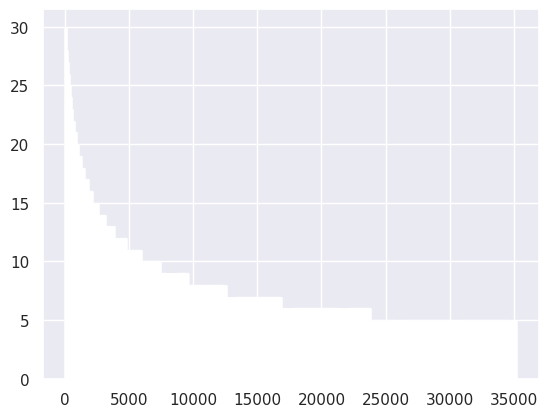

In [30]:
temp_lens = lens[lens<=30]
plt.bar([i for i in range(len(temp_lens))], temp_lens, color='skyblue')


In [4]:
# TODO: 这里要把谁是高频物品，谁是低频物品 / 谁是高频用户，谁是低频用户存一下

head_user_tail_item = []
head_user_head_item = []
tail_user_head_item = []
tail_user_tail_item = []

user_threshold = 8
item_threshold = 16
for i in range(len(Seqs)):
    seq = Seqs[i]
    if len(seq) <= user_threshold:
        tail_user= True
    else:
        tail_user=False
    if item_frequency[seq[-1]]<=item_threshold:
        tail_item = True
    else:
        tail_item = False
    if (not tail_user) and tail_item:
        head_user_tail_item.append(i)
    elif (not tail_user) and (not tail_item):
        head_user_head_item.append(i)
    elif tail_user and (not tail_item):
        tail_user_head_item.append(i)
    elif tail_user and tail_item:
        tail_user_tail_item.append(i)
print(len(head_user_tail_item), len(head_user_head_item), len(tail_user_head_item), len(tail_user_tail_item))
import pickle
with open(f"/home/zzx/seqRec/CLTrys/CoSeRec/data/{dataset_name}_head_tail.pkl","wb") as f:
    pickle.dump({"head_user_tail_item":np.array(head_user_tail_item), "head_user_head_item":np.array(head_user_head_item),
                "tail_user_head_item":np.array(tail_user_head_item), "tail_user_tail_item":np.array(tail_user_tail_item)}, f)
    

4557 5416 14019 11606


In [7]:
temp_temp1 = np.random.rand(len(Seqs), 20)
temp_temp2 = np.random.rand(len(Seqs), 1)
print(temp_temp1.shape)
a = temp_temp1[np.array(head_user_tail_item)]
print(len(head_user_tail_item))
print(a.shape)
b = temp_temp2[np.array(head_user_tail_item)]
print(b.shape)

(35598, 20)
4557
(4557, 20)
(4557, 1)
